In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.constants import R
from matplotlib import gridspec
import os
from scipy.signal import find_peaks, peak_widths
from uncertainties import ufloat
from uncertainties.umath import * 
from uncertainties import unumpy as unp

In [2]:
colours = ['blue', 'green6', 'orange', 'pink', 'red', 'uv', 'warmwhite9', 'white10', 'yellow4', 'yellowgreen']

In [3]:
bycolour = dict((colour, []) for colour in colours)
peak_bycol = dict((colour, []) for colour in colours)

for filename in os.listdir('techdata'):
    if not filename.endswith(".csv"): 
        continue 
    for col in colours: 
        if col in filename: 
            data = pd.read_csv('techdata/'+filename, header=None)
            bycolour[col].append(data)
# print(bycolour)

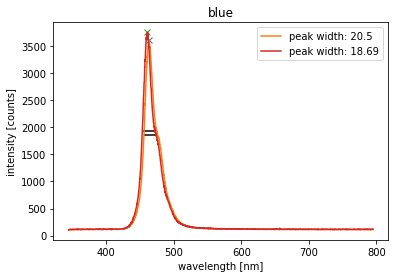

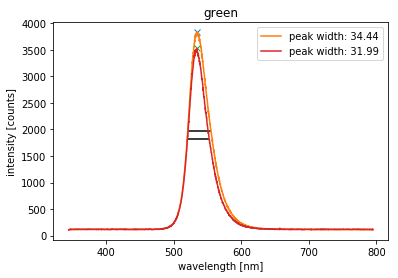

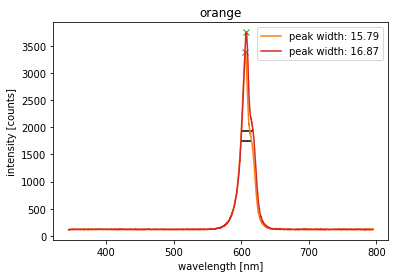

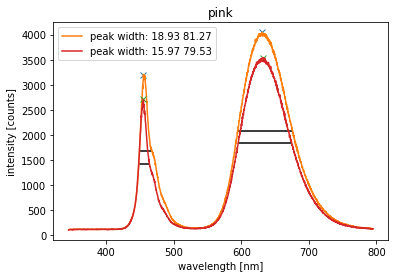

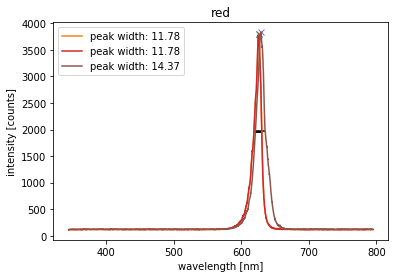

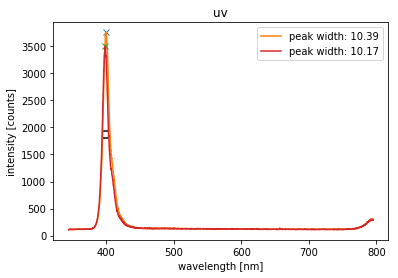

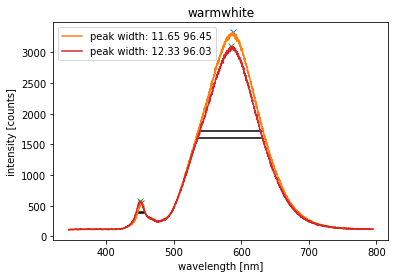

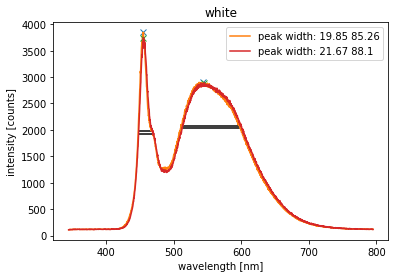

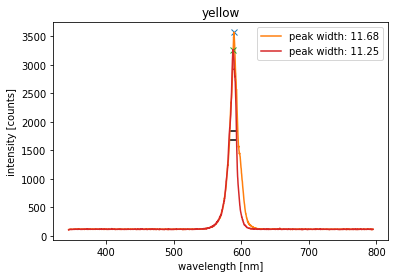

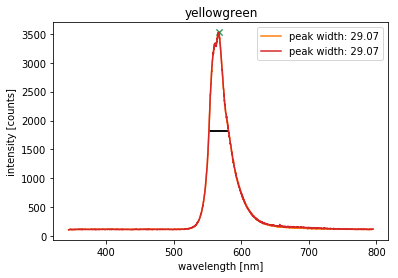

In [4]:
peak_bycol = dict((colour, []) for colour in colours)
for c in bycolour: 
    for data in bycolour[c]: 
        peaks, properties = find_peaks(data[1], width=40, prominence=1)
        plt.plot(data[0][peaks], data[1][peaks], "x", label='')
#         plt.vlines(x=data[0][peaks], ymin=data[1][peaks] - properties["prominences"], ymax = data[1][peaks], color = "C1")
        w_left = data[0][np.round(properties["left_ips"])]
        w_right = data[0][np.round(properties["right_ips"])]
        width = w_right.values -w_left.values 
        peak_bycol[c].append([data[0][peaks].values, width])
#         peak_bycol[col][1].append(width)
        plt.hlines(y=properties["width_heights"], xmin=data[0][np.round(properties["left_ips"])], 
                   xmax=data[0][np.round(properties["right_ips"])])
        plt.plot(data[0], data[1], label='peak width: '+str(width).strip('[]'))
    plt.title(''.join([i for i in c if not i.isdigit()]))
    plt.xlabel('wavelength [nm]')
    plt.ylabel('intensity [counts]')
    plt.legend()
    plt.savefig(c+'.png', bbox_inches='tight')
    plt.show()

In [5]:
out = dict((c, np.mean(peak_bycol[c], axis=0)) for c in peak_bycol)
for el in out: 
    print('{:<13}'.format(''.join([i for i in el if not i.isdigit()])) + ' has peak(s) at  '
          +'{:<20}'.format( ' ,  '.join([str('%.2f'%x) for x in out[el][0] ]) +' nm' )+' with width  '
          + '{:<18}'.format(' ,  '.join([str('%.2f'%x) for x in out[el][1] ]) +' nm')+' i.e. +/-' 
          + ' ,  '.join([str('%.0f'%(x/2)) for x in out[el][1] ]) +' nm')

blue          has peak(s) at  462.14 nm            with width  19.59 nm           i.e. +/-10 nm
green         has peak(s) at  533.88 nm            with width  33.22 nm           i.e. +/-17 nm
orange        has peak(s) at  606.47 nm            with width  16.33 nm           i.e. +/-8 nm
pink          has peak(s) at  454.96 ,  631.69 nm  with width  17.45 ,  80.40 nm  i.e. +/-9 ,  40 nm
red           has peak(s) at  626.69 nm            with width  12.64 nm           i.e. +/-6 nm
uv            has peak(s) at  399.26 nm            with width  10.28 nm           i.e. +/-5 nm
warmwhite     has peak(s) at  450.85 ,  586.00 nm  with width  11.99 ,  96.24 nm  i.e. +/-6 ,  48 nm
white         has peak(s) at  454.96 ,  543.83 nm  with width  20.76 ,  86.68 nm  i.e. +/-10 ,  43 nm
yellow        has peak(s) at  588.55 nm            with width  11.47 nm           i.e. +/-6 nm
yellowgreen   has peak(s) at  566.42 nm            with width  29.07 nm           i.e. +/-15 nm


In [18]:
I = ufloat(1.01,0.01)
V = ufloat(2.826,0.001)
R = 1
VR = I*R
VL = V-VR
w = ufloat(626.69,12.64/2)
res = VL/(3*(10**8))*1.602*10**(-19)*(w*10**(-9))
print('Red, h value is',res)

Red, h value is (6.08+/-0.07)e-34


In [22]:
I = ufloat(1.00,0.01)
V = ufloat(2.860,0.001)
R = 1
VR = I*R
VL = V-VR
w = ufloat(606.47,16.33/2)
res = VL/(3*(10**8))*1.602*10**(-19)*(w*10**(-9))
print('Orange, h value is',res)

Orange, h value is (6.02+/-0.09)e-34


In [24]:
I = ufloat(0.998,0.01)
V = ufloat(2.876,0.001)
R = 1
VR = I*R
VL = V-VR
w = ufloat(588.55,11.47/2)
res = VL/(3*(10**8))*1.602*10**(-19)*(w*10**(-9))
print('Yellow, h value is',res)

Yellow, h value is (5.90+/-0.07)e-34


In [25]:
I = ufloat(1.001,0.01)
V = ufloat(2.874,0.001)
R = 1
VR = I*R
VL = V-VR
w = ufloat(566.42,29.07/2)
res = VL/(3*(10**8))*1.602*10**(-19)*(w*10**(-9))
print('Y-G, h value is',res)

Y-G, h value is (5.67+/-0.15)e-34


In [29]:
I = ufloat(1.003,0.01)
V = ufloat(3.356,0.001)
R = 1
VR = I*R
VL = V-VR
w = ufloat(533.88,33.22/2)
res = VL/(3*(10**8))*1.602*10**(-19)*(w*10**(-9))
print('Green, h value is',res)

Green, h value is (6.71+/-0.21)e-34


In [31]:
I = ufloat(1.008,0.01)
V = ufloat(3.645,0.001)
R = 1
VR = I*R
VL = V-VR
w = ufloat(462.14,19.59/2)
res = VL/(3*(10**8))*1.602*10**(-19)*(w*10**(-9))
print('Blue, h value is',res)

Blue, h value is (6.51+/-0.14)e-34


In [32]:
I = ufloat(1.014,0.01)
V = ufloat(4.013,0.001)
R = 1
VR = I*R
VL = V-VR
w = ufloat(399.26,10.28/2)
res = VL/(3*(10**8))*1.602*10**(-19)*(w*10**(-9))
print('BUV, h value is',res)

BUV, h value is (6.39+/-0.09)e-34
